## References

1. https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Signal_Processing_and_Modeling/Signals_and_Systems_(Baraniuk_et_al.)/13%3A_Capstone_Signal_Processing_Topics/13.02%3A_The_Fast_Fourier_Transform_(FFT)

# 6 傅里叶


##  傅里叶级数

若 $f(x)$ 在 $[0,2\pi]$ 光滑, 则其在$[0,2\pi]$ 上等于它的傅里叶级数 (fourier series):
$$f(x)=\frac{a_0}{2}+\sum_{k=1}^{\infty}(a_k\cos kx+b_k\sin kx)$$

其中 $a_k = \frac 1\pi\int_{0}^{2\pi}f(x)\cos kxdx$ 以及 $b_k = \frac 1\pi\int_{0}^{2\pi}f(x)\sin kxdx$. 上式子也可以将 $a_k\cos k+b_k\sin kx$ 写成复数的指数形式:
$$f(x) = \lim_{N\rightarrow \infty}\sum_{k=-N}^{+N}c_k e^{ikx}$$
其中 $c_k= \frac{1}{2\pi }\int_{0}^{2\pi} f(x)e^{-ikx}dx$.


###  离散傅里叶 (DFT)

在上述傅里叶级数中, 为了用数值方法计算系数 $c_k$, 需要数值积分, 最简单地可以模拟定积分的定义将区间分为 $N$ 段：
$$c_k\approx \frac{1}{2\pi}\sum_{j=0}^{N-1}f\left(\frac{2j\pi}{N}\right)e^{-ik\frac{2\pi j}{n}}\cdot \frac{2\pi}{N}$$
即
$$c_k=\frac{1}{N}\sum_{j=0}^{N-1}f\left(\frac{2j\pi}{N}\right)e^{-\frac{2\pi i}{n}\cdot kj}$$

离散傅里叶 (discrete Fourier transform, DFT) 的问题就是给定 $n$ 个数 $y_0,\dotsc,y_{n-1}\in\mathbb C\ (y_k = \frac 1nf\left(\frac{2j\pi}{n}\right))$, 要求计算
$$c_k = \sum_{j=0}^{n-1}y_je^{-\frac{2\pi i}{n}\cdot kj}\quad (k=0,1,\dotsc,n-1)$$
其矩阵形式为 $c = F_ny$, 即: $\omega = e^{-\frac{2\pi i}{n}}$
$$\left[\begin{matrix}
c_0 \\ c_1 \\ c_2 \\ \vdots \\ c_{n-1}\end{matrix}\right] = \left[\begin{matrix}
\omega^0 & \omega^0 & \omega^0 & \dotsc & \omega^{0}\\
\omega^0 & \omega^1 & \omega^2 & \dotsc & \omega^{n-1}\\
\omega^0 & \omega^2 & \omega^4 & \dotsc & \omega^{2(n-1)}\\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
\omega^0 & \omega^{n-1} & \omega^{2(n-1)} & \dotsc &\omega^{(n-1)^2}
\end{matrix}\right]
\left[\begin{matrix} y_0 \\ y_1 \\ y_2 \\\vdots \\ y_{n-1}\end{matrix}\right] $$

### 逆离散傅里叶变换 (IDFT)

逆离散傅里叶变换 (inverse discrete Fourier transform, IDFT) 即求 $y = F_n^{-1}c$. 注意 $\overline{F_n} = F_n^* = nF_n^{-1}$, 故其有等价形式: $$y = \frac 1n \overline{F_n}c$$

证: 显然 $\overline{F_n} = F_n^* $  下证明 $F_n^*F_n = nI_n$. 直接计算 $F_n$ 的第 $k,l\ (1\leqslant k,l\leqslant n)$ 两列的复内积:
$$\sum_{j=0}^n \omega^{(j-1)k}\cdot \overline{ \omega^{(j-1)l}}
=\sum_{j=0}^n \omega^{(j-1)(k-l)}=\left\{\begin{array}{ll} n & k=l,\\ 0 & k\neq l.\end{array}\right.$$

注: 这表明 $F_n/\sqrt n$ 是酉矩阵.

### 傅里叶变换

对于光滑函数 $f(t)$, 其傅里叶变换为
$$F(s)=\int_{-\infty}^{+\infty}e^{-ist}f(t)dt$$
再对 $F$ 进行逆傅里叶变换可以得到 $f$, 形式为
$$f(t) = \frac{1}{2\pi}\int_{-\infty}^{+\infty}e^{ist}F(s)ds$$

## 快速傅里叶 (FFT)

快速(离散)傅里叶变换 (fast Fourier transform) 指出: 利用 $F_n$ 的性质, 矩阵乘法 $y = F_nc$ 并不需要 $O(n^2)$ 时间复杂度, 可以做到 $O(n\log n)$ 复杂度. 这个是由 Gauss / Cooley-Tukey 发现的.

### Radix-2 FFT

运用分治 (divide and conquer) 思想, 若 $n$ 是偶数, 记 $\omega_n = e^{-\frac{2\pi i}{n}}$. 算 $c_k$ 可以使用如下办法:

$$\begin{aligned}c_k & = \omega_n^0 y_0 + \omega_n^k y_1 + \omega_n^{2k} y_2 + \dotsc +\omega_n^{(n-1)k}y_{n-1}\\  &=\left(\omega_n^0 y_0 +\omega_n^{2k}y_2+\dotsc +\omega_n^{(n-2)k}y_{n-2}\right) + 
 \omega_n^k\left(\omega_n^0 y_1 +\omega_n^{2k}y_3+\dotsc +\omega_n^{(n-2)k}y_{n-1}\right)\\
  &=\left(\omega_{\frac n2}^0 y_0 +\omega_{\frac n2}^{k}y_2+\dotsc +\omega_{\frac n2}^{\frac{n-2}{2}k}y_{n-2}\right) + 
 \omega_n^k\left(\omega_{\frac n2}^0 y_1 +\omega_{\frac n2}^{k}y_3+\dotsc +\omega_{\frac n2}^{\frac{n-2}{2}k}y_{n-1}\right)
 \end{aligned}$$

 相当于对 $[y_0,y_2,\dotsc,y_{n-2}]^T$ 与 $[y_1,y_3,\dotsc,y_{n-1}]^T$ 作次数为 $\frac n2$ 的离散傅里叶变换再合并. 时间复杂度具有递推关系 $T(n) = T(n/2) + O(n)$ 即 $T(n) = O(n\log n)$.    

特别地, 若 $n$ 为 $2$ 的幂, 则可以一直进行如上所述的分治. 故一般可以采用 $n$ 为 $2$ 的幂时的 FFT.

### 蝴蝶图

如下图片展示了 $n = 8$ 分治顺序, 称为蝴蝶图 (butterfly diagram). 右侧 $0,4,2,6,1,5,3,7$ 的二进制恰好是 $0,1,2,3,4,5,6,7$ 二进制的镜像. 每一个蓝框为一组 FFT. 据此 FFT 只需要 $O(1)$ 的额外空间.

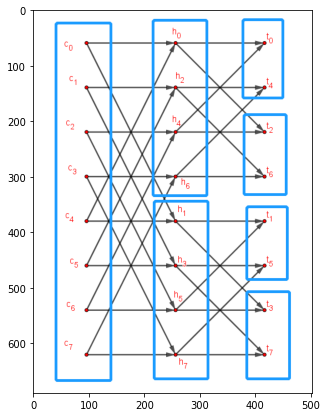

In [9]:
from PIL import Image
from matplotlib import pyplot as plt 
import numpy as np
plt.figure(figsize = (5,8))
plt.imshow(Image.open('butterfly_diagram.png'))
plt.show()

### Kronecker

若 $n$ 为偶数, 则 $F_n = (I_{\frac n2}\otimes F_{2})\Lambda(F_{\frac n2}\otimes I_2)P$, 其中 $P$ 是置换阵, $\Lambda$ 是对角阵.
 
证: 由 FFT, 线性算子 $F_n$ 由置换 $P:\ [x_0,x_1,x_2,\dotsc,x_{n-1}]^T\mapsto [x_0,x_2,\dotsc,x_{n-2},x_1,x_3,\dotsc,x_{n-1}]^T$, 分治, 整合三步复合而成. 分治为
$$\left[\begin{matrix}w_n^0 &  & w_n^0 & & w_n^0 &  & \dotsc & w_n^0 & \\ 
 & w_n^0 &  & w_n^0 &  & w_n^0 & \dotsc & & w_n^0 \\ 
w_n^0 &  & w_n^2 & & w_n^4 & & \dotsc & w_n^{n-2} &  \\ 
 & w_n^0 &  & w_n^2 &  & w_n^4 &   \dotsc & & w_n^{n-2} \\ 
w_n^0 &  & w_n^4 & & w_n^8 & & \dotsc & w_n^{2(n-2)} &  \\ 
 & w_n^0 &  & w_n^4 &  & w_n^8 &    \dotsc &  & w_n^{2(n-2)} \\ 
\vdots &\vdots &\vdots &\vdots & \vdots& \vdots &  \ddots&\vdots & \vdots\\ 
w_n^0 &  & w_n^{2(n-2)} & & w_n^{4(n-2)} & & \dotsc & w_n^{(n-2)^2} &  \\ 
 & w_n^0 &  &  w_n^{2(n-2)} &  & w_n^{4(n-2)} &   \dotsc & & w_n^{(n-2)^2} \\ 
\end{matrix}\right]\left[\begin{matrix}x_0\\x_2\\ \vdots \\x_{n-2}\\x_1\\x_3\\\vdots\\x_{n-1}\end{matrix}\right]$$

该矩阵即为 $F_{\frac n2}\otimes I_2$.

至于整合, 略……

## 卷积

定义两个函数 $f,g$ 的卷积 (convolution) 是一个新的函数,
$$(f*g)(\tau )=\int_{-\infty}^{+\infty}f(t)g(\tau - t)dt$$

显然卷积具有交换律.

### 卷积定理

记 $\hat u(s) = \int_{-\infty}^{+\infty}u(t)e^{-ist}dt$ 为傅里叶变换. 则卷积的傅里叶变换等于傅里叶变换的乘积:
$$\widehat{f*g}= \hat f\cdot\hat g\quad\quad \widehat{f\cdot g} = \frac{1}{2\pi}\hat f *\hat g$$

证: 
$$\begin{aligned}\widehat{f*g}(s) &= 
\int_{-\infty}^{+\infty}(f*g)(t)e^{-ist}dt
=\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty}f(r)g(t -r)dre^{-ist}dt\\
&=\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty}f(r)e^{-isr}g(t -r)e^{-is(t-r)}drdt \\
&=\int_{-\infty}^{+\infty}f(r)e^{-isr}dr \int_{-\infty}^{+\infty}g(t -r)e^{-is(t-r)}dt \\ 
&=\hat f(s)\cdot \hat g(s)\end{aligned}$$
反过来,
$$\begin{aligned}\frac{1}{2\pi }\left(\hat f *\hat g\right)(s)&
=\frac{1}{2\pi}\int_{-\infty}^{+\infty}\hat f(r)\hat g(s-r)dr
=\frac{1}{2\pi}\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}f(u)e^{-iru}du
\int_{-\infty}^{+\infty}g(v)e^{-i(s-r)v)}dvdr\\&
=\frac{1}{2\pi}\lim_{N\rightarrow+\infty}\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}e^{-isv}f(u)g(v)dudv\int_{-N}^{+N}e^{ir(v-u)}dr\\
&=\frac{1}{2\pi}\lim_{N\rightarrow+\infty}\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}e^{-isv}f(u)g(v)
\frac{2\sin (N(v-u))}{v-u}dudv\\
&=\frac{1}{2\pi}\lim_{N\rightarrow+\infty}\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}e^{-is(u+t)}f(u)g(u+t)
\frac{2\sin (Nt)}{t}dudt\\
&=\frac{1}{2\pi}\lim_{N\rightarrow+\infty}\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}e^{-is(u+\frac tN)}f(u)g(u+\frac tN)\frac{2\sin (t)}{t}dudt\\
&= \int_{-\infty}^{+\infty}e^{-isu}f(u)g(u) du 
\end{aligned}$$
最后一步使用了勒贝格控制收敛定理 (LDCT) 与 Dirichlet 积分: $\int_{-\infty}^{+\infty}\frac{2\sin t}{t}dt = \pi$.

### Parseval 恒等式

设 $\Vert u\Vert^2 = \int_{-\infty}^{+\infty} u(t)\overline u(t)dt$ 为二范数 (的平方), 若 $\Vert u\Vert$ 与 $\Vert \hat u\Vert$ 有限, 则$$\Vert \hat u\Vert_2^2 = 2\pi \Vert u\Vert_2^2$$

证: 根据卷积定理,
$$  2\pi \Vert u\Vert_2^2=2\pi \widehat{u\cdot  \overline u}(0)=(\hat u * \hat {\overline u})(0)
=\int_{-\infty}^{+\infty} \hat u(t)\hat{\overline u}(-t) dt$$
注意
$$\hat{\overline u}(-t)  = \int_{-\infty}^{+\infty}\overline u(s)e^{ist}ds = \overline{\int_{-\infty}^{+\infty}
u(s)e^{-ist}dt }= \overline {\hat u(t)}$$
故得 $  2\pi \Vert u\Vert_2^2 = \Vert \hat u\Vert_2^2$.


### 离散卷积

$\{u_k\}_{0\leqslant k<n},\{v_k\}_{0\leqslant k<n}$ 是两个长度为 $n$ 的**循环**数列, 定义其离散卷积为一个新的数列 $\{u*v_k\}$: $(u*v)_k = \sum_{j=0}^{n-1}u_jv_{k-j}$. 离散卷积对应的卷积定理为
$$\widehat{u*v}_k =\hat u_k\cdot \hat v_k\quad\quad (\widehat u\cdot v)_k = \frac 1n (\hat u*\hat v)_k$$
其中 $\hat u_k = \sum_{j=0}^{n-1}u_je^{-\frac{2\pi ikj}{n}}$ 是离散傅里叶变换. 使用离散傅里叶变换的知识, 知其 Parseval 恒等式为
$$\Vert \hat u_k\Vert_2^2 =  n \Vert u_k\Vert_2^2$$